In [9]:
import pickle
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import HalvingRandomSearchCV 
from sklearn.utils.fixes import loguniform
from sklearn.svm import SVC


vectors = pickle.load(open("data/face_vectors.pkl", "rb"))    

X, y = map(np.array, zip(*[
    (vector, int(email.endswith("carleton.edu")))
    for email, vector in vectors.items()
    if vector is not None and email != "oksonk2@carleton.edu"
]))

pipe = make_pipeline(StandardScaler(), SVC())

distributions = dict(
    svc__gamma=loguniform(2**-15, 2**3),
    svc__C=loguniform(2**-5, 2**15)
)
grid = HalvingRandomSearchCV(
    pipe, 
    param_distributions=distributions, 
    n_jobs=-1,
    verbose=1,
    factor=2,
    n_candidates=1024,
    min_resources="exhaust",
)
grid.fit(X, y)

model = grid.best_estimator_

print(f"Best params: {grid.best_params_} ({grid.best_score_})")

n_iterations: 8
n_required_iterations: 11
n_possible_iterations: 8
min_resources_: 20
max_resources_: 4393
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1024
n_resources: 20
Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
----------
iter: 1
n_candidates: 512
n_resources: 40
Fitting 5 folds for each of 512 candidates, totalling 2560 fits
----------
iter: 2
n_candidates: 256
n_resources: 80
Fitting 5 folds for each of 256 candidates, totalling 1280 fits
----------
iter: 3
n_candidates: 128
n_resources: 160
Fitting 5 folds for each of 128 candidates, totalling 640 fits
----------
iter: 4
n_candidates: 64
n_resources: 320
Fitting 5 folds for each of 64 candidates, totalling 320 fits
----------
iter: 5
n_candidates: 32
n_resources: 640
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 6
n_candidates: 16
n_resources: 1280
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 7
n_candidates: 8
n_r

In [6]:
print(f"Best params: {grid.best_params_} ({grid.best_score_})")

Best params: {'svc__C': 100.0, 'svc__gamma': 0.001} (0.6720826413860739)


In [26]:
print(X.shape[0])

4393


In [16]:
from IPython.display import Image, display
from face_recognition.api import load_image_file, face_encodings
from scraper import IMG_FOLDER
from io import BytesIO
import requests

def show_image(email):
    display(Image(open(IMG_FOLDER + email + ".jpg", "rb").read()))

def predict(**kwargs):
    """Call must provivde exactly one of `email`, `img_url`, `img_fp` or `vec`."""
    
    if "vec" in kwargs:
        vec = kwargs["vec"]

    elif "img_url" in kwargs:
        with requests.get(kwargs["img_url"]) as r:
            image = load_image_file(BytesIO(r.content))
        vec = face_encodings(image)[0]

    elif "img_fp" in kwargs:
        load_image_file(kwargs["img_fp"])
        vec = face_encodings(image)[0]

    elif "email" in kwargs:
        vec = vectors[kwargs["email"]]
        show_image(kwargs["email"])

    else:
        raise ValueError("")

    prediction = model.decision_function(vec.reshape(1, -1))


    print(f"{'Carl' if prediction > 0 else 'Ole'} ({prediction[0]:.3f})")

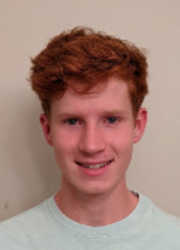

Carl (1.001)


In [17]:
predict(email="olsonk2@carleton.edu")
# predict("rohrer2@stolaf.edu")

In [8]:
import bs4
import requests


def emails_from_roster_url(url, name_corrections: dict[str: str]={}):

    with requests.get(url) as r:
        soup = bs4.BeautifulSoup(r.text, "lxml")

    name_selector = ".sidearm-roster-player-name h3 a"
    roster_names = [
        el.get_text().replace("  ", " ") 
        for el in soup.select(name_selector)
    ]
    directory_names = set(
        name_corrections[name] if name in name_corrections else name
        for name in roster_names
    )

    emails = [
        email
        for email, attrs
        in directory.items()
        if attrs["name"] in directory_names
    ]

    found_names = set(directory[email]["name"] for email in emails)
    missing = found_names.symmetric_difference(directory_names)
    if missing:
        print(f"Could not find emails for {', '.join(missing)}.")

    return emails

In [17]:
import json
import pyperclip

directory = json.load(open("data/directory/carls.json"))

url = "https://athletics.carleton.edu/sports/football/roster"
footballers = emails_from_roster_url(url)

email_list = directory.keys() - set(footballers)

pyperclip.copy(", ".join(email_list))
print(len(email_list))


Could not find emails for Adward Frazier, Dominic Sasser, Ayden Vinyard, Will Maxwell, Andrew Thompson, Bemnet Abebayehu.
1931


In [19]:
string = """cohenl2@carleton.edu,drivere@carleton.edu,mroczenskie@carleton.edu,masaddee@carleton.edu,hassellw@carleton.edu,raicevica@carleton.edu,geistk@carleton.edu,lib2@carleton.edu,chasnovm@carleton.edu,lewisr2@carleton.edu,barbere@carleton.edu,friesenh@carleton.edu,blacka2@carleton.edu,hansone2@carleton.edu,cichowskil@carleton.edu,zhangm3@carleton.edu,ramosa2@carleton.edu,yangm4@carleton.edu,wyffelsm@carleton.edu,jingg@carleton.edu,mutschlerb@carleton.edu,kharea@carleton.edu,landryk@carleton.edu,lesurea2@carleton.edu,aguirree@carleton.edu,stanchfieldr@carleton.edu,garciam3@carleton.edu,ishikawas@carleton.edu,anyaegbunamu@carleton.edu,hafnerb@carleton.edu,grossere@carleton.edu,macdonaldj@carleton.edu,candelariab@carleton.edu,bosmann@carleton.edu,canast@carleton.edu,obergj@carleton.edu,wuj5@carleton.edu,iyera@carleton.edu,gebreegziabhery@carleton.edu,tinea@carleton.edu,dujsikovaa@carleton.edu,berryn@carleton.edu,mansone@carleton.edu,vanders@carleton.edu,wilsona5@carleton.edu,scotti2@carleton.edu,lazog@carleton.edu,ingrame@carleton.edu,mihiram@carleton.edu,lentferl@carleton.edu,kisgeczib@carleton.edu,parrm@carleton.edu,antrimr@carleton.edu,frischm@carleton.edu,noisecatz@carleton.edu,sharmas@carleton.edu,drummondj@carleton.edu,penna@carleton.edu,mackinj2@carleton.edu,eae@carleton.edu,lauere@carleton.edu,bachulisj@carleton.edu,czernieckiv@carleton.edu,lus2@carleton.edu,konidenap@carleton.edu,donahuea2@carleton.edu,matha@carleton.edu,grana@carleton.edu,johnsonp4@carleton.edu,yoony@carleton.edu,petersonk@carleton.edu,fongj@carleton.edu,brannanq@carleton.edu,gallina3@carleton.edu,wellera@carleton.edu,acerom@carleton.edu,kimballk2@carleton.edu,hoo@carleton.edu,hea@carleton.edu,hortona@carleton.edu,daviso@carleton.edu,lunae@carleton.edu,knapph@carleton.edu,beddoww@carleton.edu,vadnaiss@carleton.edu,madsenr@carleton.edu,boerow@carleton.edu,luy@carleton.edu,glasse@carleton.edu,selkowitzj@carleton.edu,kellyr2@carleton.edu,gaborm@carleton.edu,johnsone3@carleton.edu,widmana@carleton.edu,gonzaleza@carleton.edu,shallenbergers@carleton.edu,krohne@carleton.edu,goenkam@carleton.edu,tangumaj@carleton.edu,englishk@carleton.edu,yorkd@carleton.edu,farmerk2@carleton.edu,jonesc2@carleton.edu,mitalskim@carleton.edu,gulledges@carleton.edu,nguyenc@carleton.edu,goodmand@carleton.edu,nevillek@carleton.edu,vazquezi@carleton.edu,welchp@carleton.edu,heine@carleton.edu,sagalg@carleton.edu,grayt2@carleton.edu,maloolyg@carleton.edu,carlsonj2@carleton.edu,whitedavisj@carleton.edu,markss2@carleton.edu,takedah@carleton.edu,vipparlaa@carleton.edu,guzmanm@carleton.edu,alvarezl@carleton.edu,matthesg@carleton.edu,tannirae@carleton.edu,watte@carleton.edu,stepanskiw@carleton.edu,posnerc@carleton.edu,barnetto@carleton.edu,romanenkos@carleton.edu,rapoports@carleton.edu,schurs@carleton.edu,wintert2@carleton.edu,safdarh@carleton.edu,cordovai@carleton.edu,albrightk@carleton.edu,zhangc3@carleton.edu,walkerj2@carleton.edu,bridgemana@carleton.edu,ulicnys@carleton.edu,varmaa@carleton.edu,monsont@carleton.edu,goldm2@carleton.edu,jamesona@carleton.edu,assalip@carleton.edu,eidelhochm@carleton.edu,pricharde@carleton.edu,loc@carleton.edu,ahmedt@carleton.edu,greggr2@carleton.edu,adamsc2@carleton.edu,tumaa@carleton.edu,chappellg@carleton.edu,beretsl@carleton.edu,leegilligana@carleton.edu,furlongm@carleton.edu,malhotram@carleton.edu,millikene@carleton.edu,escutiam@carleton.edu,knappc@carleton.edu,flemingw2@carleton.edu,donnellyp@carleton.edu,causeyj@carleton.edu,beasleyt2@carleton.edu,buik@carleton.edu,sallingerp@carleton.edu,lattaln@carleton.edu,greenm3@carleton.edu,akrel@carleton.edu,millere3@carleton.edu,moranl2@carleton.edu,rughanik@carleton.edu,chaed@carleton.edu,bhogarajus@carleton.edu,wilcoxt@carleton.edu,liskot@carleton.edu,crumb@carleton.edu,abelsonk@carleton.edu,wuc2@carleton.edu,troopw@carleton.edu,finholtc@carleton.edu,osbornt@carleton.edu,stroebell@carleton.edu,flowersr@carleton.edu,marasht@carleton.edu,rubinpopea@carleton.edu,sebertf@carleton.edu,champlisst@carleton.edu,johnsonlacosss@carleton.edu,robertsa2@carleton.edu,lina3@carleton.edu,pandeyk@carleton.edu,merrells@carleton.edu,piccirilloj@carleton.edu,sajwanis@carleton.edu,wrigleye@carleton.edu,kimbels@carleton.edu,leonettia@carleton.edu,weinsteinc@carleton.edu,glosss@carleton.edu,euaanantp@carleton.edu,gormane2@carleton.edu,princeg2@carleton.edu,prichards@carleton.edu,changstuckiw@carleton.edu,marksa@carleton.edu,neiroukhm@carleton.edu,djerfp@carleton.edu,chekhovoiv@carleton.edu,akyianun@carleton.edu,willmorej@carleton.edu,formano@carleton.edu,macraesadekh@carleton.edu,schaferb@carleton.edu,heilbronnerr@carleton.edu,gueyec@carleton.edu,wilmots2@carleton.edu,vaganovv@carleton.edu,biny@carleton.edu,cooperk@carleton.edu,villanuevaj@carleton.edu,zhangyangj@carleton.edu,fisherk2@carleton.edu,rapaczs2@carleton.edu,koeniga@carleton.edu,enriquezd@carleton.edu,hultmanl@carleton.edu,madsena@carleton.edu,hawadlea@carleton.edu,cotaa@carleton.edu,hussemans@carleton.edu,stinebaughj@carleton.edu,cadaramc@carleton.edu,wangm5@carleton.edu,friedmanl2@carleton.edu,brookskahnh@carleton.edu,yanaij@carleton.edu,leonarda2@carleton.edu,schondorfa@carleton.edu,bundyl@carleton.edu,lundbergh@carleton.edu,lyonsk@carleton.edu,chenr6@carleton.edu,carragherj@carleton.edu,vazquezm@carleton.edu,keiltyf@carleton.edu,wongc2@carleton.edu,jonesj2@carleton.edu,thurstond@carleton.edu,avilal@carleton.edu,milliganc@carleton.edu,polancoa@carleton.edu,drapers2@carleton.edu,laveys@carleton.edu,smithm7@carleton.edu,nicholasp@carleton.edu,kleinhansc@carleton.edu,conev@carleton.edu,sjaastadk@carleton.edu,drakedunnc@carleton.edu,lees7@carleton.edu,assafn@carleton.edu,steverb@carleton.edu,buhmans@carleton.edu,solakhavam@carleton.edu,crewsa2@carleton.edu,scotte2@carleton.edu,witneyj@carleton.edu,lozoyaa@carleton.edu,kiskers@carleton.edu,jahne@carleton.edu,jamesc3@carleton.edu,lenzers@carleton.edu,galec@carleton.edu,parrotta2@carleton.edu,squiresh@carleton.edu,trucksest@carleton.edu,jinga@carleton.edu,dacunham@carleton.edu,commonsj@carleton.edu,mukherjia2@carleton.edu,dema@carleton.edu,meesenat@carleton.edu,vegao@carleton.edu,millera3@carleton.edu,lin@carleton.edu,segalm@carleton.edu,garciad2@carleton.edu,harte@carleton.edu,quasts@carleton.edu,klinem2@carleton.edu,broadusm@carleton.edu,goldberge@carleton.edu,neidc@carleton.edu,romans2@carleton.edu,antrims@carleton.edu,kirkhoper@carleton.edu,diiuliol@carleton.edu,songy2@carleton.edu,crimmeln@carleton.edu,painem2@carleton.edu,liuh@carleton.edu,muellern@carleton.edu,pasternakt@carleton.edu,smarta@carleton.edu,robinsonj2@carleton.edu,strathmana@carleton.edu,shanaas@carleton.edu,griffina2@carleton.edu,haysa@carleton.edu,winhallk@carleton.edu,marksb2@carleton.edu,legbaf@carleton.edu,gaoa@carleton.edu,cohena2@carleton.edu,puzellaw@carleton.edu,yuana@carleton.edu,farnsworthh@carleton.edu,johnsonm3@carleton.edu,baldoj@carleton.edu,nagaokay@carleton.edu,edmondsh@carleton.edu,hollebp@carleton.edu,truebenbachc@carleton.edu,claussm@carleton.edu,stametsf@carleton.edu,ferrerl@carleton.edu,kuangj@carleton.edu,hommeyerj@carleton.edu,dongz@carleton.edu,caplanb2@carleton.edu,helmkampt@carleton.edu,lees4@carleton.edu,mcmanuss@carleton.edu,friedmant@carleton.edu,atochab@carleton.edu,parkersone@carleton.edu,poreddyn@carleton.edu,tiltonm@carleton.edu,tianz@carleton.edu,dicarlos@carleton.edu,rowlandl2@carleton.edu,shabaitah@carleton.edu,blackmonjimenezd@carleton.edu,sokolowa@carleton.edu,kammannm@carleton.edu,mazura@carleton.edu,alsheikhc@carleton.edu,binsc@carleton.edu,hardyg@carleton.edu,huangv2@carleton.edu,singhk@carleton.edu,katarie@carleton.edu,haywarde2@carleton.edu,fengw@carleton.edu,kellyw3@carleton.edu,nachtm2@carleton.edu,snidmanl@carleton.edu,lehra@carleton.edu,sternh2@carleton.edu,louisa@carleton.edu,diass@carleton.edu,nykampc@carleton.edu,sunn2@carleton.edu,beckerr3@carleton.edu,leeg3@carleton.edu,duffyk@carleton.edu,dalea2@carleton.edu,onabolub@carleton.edu,ogradyf@carleton.edu,chiers@carleton.edu,cooka2@carleton.edu,cardonao@carleton.edu,lees3@carleton.edu,freedmanm@carleton.edu,rybarczykj@carleton.edu,abebayehub@carleton.edu,krollc@carleton.edu,renb@carleton.edu,kellerb2@carleton.edu,sandersj2@carleton.edu,emekar@carleton.edu,gwina@carleton.edu,arbogaste@carleton.edu,delgadoj@carleton.edu,laffayet@carleton.edu,sirothphiphats@carleton.edu,daleyj@carleton.edu,youngr2@carleton.edu,wardp@carleton.edu,barkerk@carleton.edu,whiteakere@carleton.edu,sheny2@carleton.edu,offmane@carleton.edu,dowlinge2@carleton.edu,kellerm2@carleton.edu,lobetg@carleton.edu,rockd@carleton.edu,ramans@carleton.edu,emlent@carleton.edu,shahidm@carleton.edu,fridkina@carleton.edu,baconm2@carleton.edu,claussa@carleton.edu,dhungels@carleton.edu,rajad@carleton.edu,fickl@carleton.edu,lankfordr@carleton.edu,burnsider@carleton.edu,xiongx2@carleton.edu,rahadiana@carleton.edu,azeezf@carleton.edu,joness5@carleton.edu,reyese@carleton.edu,blocka@carleton.edu,tiguilah@carleton.edu,johnstonl@carleton.edu,roesslera@carleton.edu,dongh@carleton.edu,bradjanv@carleton.edu,borgmannm@carleton.edu,goldmanc@carleton.edu,ederingtons@carleton.edu,eleveldb@carleton.edu,kangt@carleton.edu,rahmans@carleton.edu,mukeshimanag@carleton.edu,marlinj@carleton.edu,renem@carleton.edu,hettlea@carleton.edu,jalilia@carleton.edu,steinera2@carleton.edu,kraabels@carleton.edu,cunninghame@carleton.edu,sanchezn@carleton.edu,sherrickb@carleton.edu,dengs2@carleton.edu,groosj@carleton.edu,hadjiyanise@carleton.edu,watsone2@carleton.edu,garciaa@carleton.edu,pinkneyn@carleton.edu,chenga3@carleton.edu,laz@carleton.edu,rolandc@carleton.edu,hev@carleton.edu,smithc4@carleton.edu,awadm@carleton.edu,wienerc@carleton.edu,renteld@carleton.edu,zhenga4@carleton.edu,misplonj@carleton.edu,shaha2@carleton.edu,williamst4@carleton.edu,orensteint@carleton.edu,laytonm2@carleton.edu,stewarta2@carleton.edu,widrowi@carleton.edu,shapirob2@carleton.edu,yankwittr@carleton.edu,taylorc2@carleton.edu,saida@carleton.edu,aladetana@carleton.edu,luongn2@carleton.edu,colindrezn@carleton.edu,cechinir@carleton.edu,julies@carleton.edu,rojeke@carleton.edu,lamn@carleton.edu,moorez@carleton.edu,yamaguchih@carleton.edu,basavareddir@carleton.edu,shusterl@carleton.edu,watta@carleton.edu,amentk@carleton.edu,halle2@carleton.edu,johnsont4@carleton.edu,harrisona@carleton.edu,destah@carleton.edu,sheridanh@carleton.edu,bakkej@carleton.edu,marvinc3@carleton.edu,dellefaves@carleton.edu,koellingh@carleton.edu,dirkswagers@carleton.edu,hudsons2@carleton.edu,hempels@carleton.edu,musan@carleton.edu,wangn4@carleton.edu,radinskyj@carleton.edu,guerrerov@carleton.edu,hansong2@carleton.edu,mittonfrya@carleton.edu,mccartys@carleton.edu,saksenac@carleton.edu,bensone@carleton.edu,woodruffs@carleton.edu,rodrigueza2@carleton.edu,walshw@carleton.edu,richarte@carleton.edu,winstonl2@carleton.edu,kucure@carleton.edu,chaveye@carleton.edu,hazeng@carleton.edu,izabayop@carleton.edu,taa@carleton.edu,kimt2@carleton.edu,vuea@carleton.edu,galambosa@carleton.edu,melvillec@carleton.edu,lopezn@carleton.edu,crowni@carleton.edu,hornel2@carleton.edu,cabanelac@carleton.edu,flanagano@carleton.edu,votrubam@carleton.edu,kimd@carleton.edu,wyckoffs@carleton.edu,munn@carleton.edu,boeror@carleton.edu,jettya@carleton.edu,andersoni@carleton.edu,mccayi@carleton.edu,michaels@carleton.edu,salijk@carleton.edu,barryhan@carleton.edu,lautenbachw@carleton.edu,batsaikhanb@carleton.edu,venetise@carleton.edu,borlaka@carleton.edu,chetitac@carleton.edu,fernandezm@carleton.edu,salomonl@carleton.edu,petrinih@carleton.edu,ziemsr@carleton.edu,isaacsj3@carleton.edu,songd@carleton.edu,cuia@carleton.edu,eriksend@carleton.edu,wange3@carleton.edu,choud2@carleton.edu,link@carleton.edu,bagerekap@carleton.edu,newmanl2@carleton.edu,brownr2@carleton.edu,kirklandk@carleton.edu,marshn2@carleton.edu,durdags@carleton.edu,yuez@carleton.edu,santamariar@carleton.edu,riessb@carleton.edu,mensendiekh@carleton.edu,muraharin@carleton.edu,nicholsonj@carleton.edu,baggetts@carleton.edu,cebulashl@carleton.edu,heynesk@carleton.edu,mohamedi2@carleton.edu,rodriguezn@carleton.edu,blanchetteg@carleton.edu,mones@carleton.edu,draheimc@carleton.edu,khana3@carleton.edu,khesinm@carleton.edu,madiganl@carleton.edu,donovanm@carleton.edu,munrok@carleton.edu,grahame2@carleton.edu,yipk@carleton.edu,eversolls@carleton.edu,russellb2@carleton.edu,akyianua@carleton.edu,ashe@carleton.edu,nelsonj3@carleton.edu,heplera@carleton.edu,colliso@carleton.edu,falka@carleton.edu,blanchardm@carleton.edu,maringc@carleton.edu,wallaceg@carleton.edu,armstrongk@carleton.edu,wangs6@carleton.edu,rosea@carleton.edu,wilsond3@carleton.edu,websterc@carleton.edu,appelj@carleton.edu,quinns@carleton.edu,kellyp2@carleton.edu,thomastothe@carleton.edu,nguyend2@carleton.edu,yaxn@carleton.edu,mookencherryk@carleton.edu,reynagag@carleton.edu,smithr4@carleton.edu,mcferrink@carleton.edu,berlerm@carleton.edu,khana2@carleton.edu,nyamaot@carleton.edu,williamsn2@carleton.edu,kindallv@carleton.edu,gaoe@carleton.edu,isaacmans@carleton.edu,chenk4@carleton.edu,uyekif@carleton.edu,prasolova@carleton.edu,rogersm@carleton.edu,ashurstd@carleton.edu,tantitanawatt@carleton.edu,johnstonw2@carleton.edu,macveaghc@carleton.edu,yeomj@carleton.edu,zhangt@carleton.edu,dominguezj@carleton.edu,driscollg@carleton.edu,caok@carleton.edu,silvaj2@carleton.edu,asfawa@carleton.edu,katariay@carleton.edu,mckelveyb@carleton.edu,balvuenaa@carleton.edu,guangc2@carleton.edu,silknitterj@carleton.edu,peerzadac@carleton.edu,mallika@carleton.edu,nit@carleton.edu,dubins@carleton.edu,lengyels@carleton.edu,endoi@carleton.edu,mcgeheej@carleton.edu,raon@carleton.edu,orjalae@carleton.edu,mccrearyw@carleton.edu,birkk@carleton.edu,francoj@carleton.edu,eiferta@carleton.edu,culverwellr@carleton.edu,pozzii@carleton.edu,fishero@carleton.edu,jensent2@carleton.edu,rossa2@carleton.edu,wormanm@carleton.edu,cuttera@carleton.edu,trant2@carleton.edu,soforenkov@carleton.edu,zengt@carleton.edu,strikem@carleton.edu,helmboldk@carleton.edu,farrl@carleton.edu,shumwaya@carleton.edu,rosez@carleton.edu,rhyneers@carleton.edu,trawt@carleton.edu,schafferb@carleton.edu,shahs2@carleton.edu,buonopanee@carleton.edu,hes2@carleton.edu,bastimarr@carleton.edu,mccreal@carleton.edu,phamm@carleton.edu,readyp@carleton.edu,buchmanl@carleton.edu,konshiel@carleton.edu,shresthaw@carleton.edu,singerg@carleton.edu,greenleea@carleton.edu,ogutum@carleton.edu,libergef@carleton.edu,ketemah@carleton.edu,daot2@carleton.edu,solomonc@carleton.edu,boettigerl@carleton.edu,hussaink@carleton.edu,xiaol@carleton.edu,ghaneabassirik@carleton.edu,guzmanc@carleton.edu,majumdarm@carleton.edu,bloomm@carleton.edu,battista@carleton.edu,hayesrichn@carleton.edu,tilleyr@carleton.edu,gudgelr@carleton.edu,helmstetterb@carleton.edu,watsone3@carleton.edu,ramekeri@carleton.edu,jonesa2@carleton.edu,thompsond3@carleton.edu,thantm@carleton.edu,keena@carleton.edu,fielderm@carleton.edu,khayatn@carleton.edu,yangm3@carleton.edu,westone@carleton.edu,lelea2@carleton.edu,vilmsj@carleton.edu,bansea@carleton.edu,lesneskia@carleton.edu,preissb@carleton.edu,kandelj2@carleton.edu,wanga4@carleton.edu,fischere2@carleton.edu,lanierk@carleton.edu,fallahn@carleton.edu,naikolsonr@carleton.edu,zimmermans@carleton.edu,cherkashinaa@carleton.edu,waltersa2@carleton.edu,wardh2@carleton.edu,kondratiukm@carleton.edu,floresg@carleton.edu,forsterb@carleton.edu,momseng@carleton.edu,hurtubisel@carleton.edu,lintone@carleton.edu,turnerb2@carleton.edu,honga2@carleton.edu,mere@carleton.edu,wonacottr@carleton.edu,wursta@carleton.edu,pedersena@carleton.edu,shoree@carleton.edu,kennedyl@carleton.edu,alvarezm3@carleton.edu,cohena3@carleton.edu,zhaos3@carleton.edu,huangc2@carleton.edu,shoveb@carleton.edu,serotam@carleton.edu,dehaans@carleton.edu,rosenbergh@carleton.edu,cashins@carleton.edu,lazob@carleton.edu,zhaoh2@carleton.edu,sutcliffea2@carleton.edu,swanserd@carleton.edu,pattisona@carleton.edu,serranon@carleton.edu,michiia@carleton.edu,brodyc@carleton.edu,montgomeryl@carleton.edu,chine@carleton.edu,sangvongp@carleton.edu,ochoaj@carleton.edu,honga@carleton.edu,goldhaberz@carleton.edu,jonest3@carleton.edu,holcombh@carleton.edu,sawatzkec@carleton.edu,davidsons@carleton.edu,lyonss@carleton.edu,macleodh@carleton.edu,ramazania@carleton.edu,woodruffe@carleton.edu,capeilleresh@carleton.edu,mirzaw@carleton.edu,zhoutan@carleton.edu,mcphersonn@carleton.edu,maegik@carleton.edu,dinardoz@carleton.edu,primw@carleton.edu,battanib@carleton.edu,pihlajaa@carleton.edu,coganp2@carleton.edu,hallm5@carleton.edu,caballeron@carleton.edu,blairs@carleton.edu,rileys2@carleton.edu,brattonb@carleton.edu,buchananp@carleton.edu,banovetzm@carleton.edu,hallc3@carleton.edu,tehranin@carleton.edu,gatewoodg@carleton.edu,xues@carleton.edu,linj3@carleton.edu,patels4@carleton.edu,paulsoni2@carleton.edu,adamst2@carleton.edu,farrelle@carleton.edu,boltonm2@carleton.edu,dregerm@carleton.edu,gilberts2@carleton.edu,nakamotos@carleton.edu,fostert2@carleton.edu,mooreb@carleton.edu,votawh@carleton.edu,ortiza2@carleton.edu,bakerc2@carleton.edu,kellyz@carleton.edu,klinknert@carleton.edu,kadams@carleton.edu,duffyf@carleton.edu,kachmand@carleton.edu,riverar@carleton.edu,morduchl@carleton.edu,jeffersonk@carleton.edu,thaon3@carleton.edu,trank3@carleton.edu,rubeyp@carleton.edu,boyces@carleton.edu,worrellm@carleton.edu,baigt@carleton.edu,qina@carleton.edu,taratsasa@carleton.edu,cramptonc@carleton.edu,lewisd3@carleton.edu,viswanathana@carleton.edu,chuens@carleton.edu,thomask2@carleton.edu,caie@carleton.edu,belln@carleton.edu,washburna@carleton.edu,tilsonk@carleton.edu,pohlmanr@carleton.edu,kinsellae@carleton.edu,lerdaur@carleton.edu,becklerj@carleton.edu,merchantc@carleton.edu,sassl@carleton.edu,grayzelc@carleton.edu,liw4@carleton.edu,rileyi@carleton.edu,dambergottm@carleton.edu,perfettos@carleton.edu,neyc@carleton.edu,maitlandl@carleton.edu,scoolerh@carleton.edu,mccaffreyl@carleton.edu,polleym@carleton.edu,staffa@carleton.edu,choom@carleton.edu,santosb@carleton.edu,lik@carleton.edu,schultzc2@carleton.edu,goetzs2@carleton.edu,alveys@carleton.edu,foreros@carleton.edu,digavallik@carleton.edu,akeelh@carleton.edu,shent@carleton.edu,lic4@carleton.edu,cramerj2@carleton.edu,sparkss@carleton.edu,wangs7@carleton.edu,ehresmannp@carleton.edu,luoj2@carleton.edu,villagomeze@carleton.edu,harrisl2@carleton.edu,nguyent4@carleton.edu,lie2@carleton.edu,ronlopezn@carleton.edu,boguel@carleton.edu,hikinok@carleton.edu,schustero@carleton.edu,chent4@carleton.edu,satherz@carleton.edu,surdutovicho@carleton.edu,airoldie@carleton.edu,fanp@carleton.edu,pughp@carleton.edu,josephn@carleton.edu,kleina4@carleton.edu,leeb4@carleton.edu,romanovaa@carleton.edu,pauligg@carleton.edu,ulrichk@carleton.edu,zhangs@carleton.edu,thallm@carleton.edu,dorchens@carleton.edu,hansonj3@carleton.edu,quigleyt@carleton.edu,leisherz@carleton.edu,nabaris@carleton.edu,let2@carleton.edu,toledod@carleton.edu,lefeversb@carleton.edu,hultgrenk@carleton.edu,parkj3@carleton.edu,clawsoni@carleton.edu,freedmane@carleton.edu,coyleh@carleton.edu,shookm@carleton.edu,zuckermanm@carleton.edu,valdiviam@carleton.edu,maltera@carleton.edu,zhuh@carleton.edu,hoytniemieci@carleton.edu,bensena@carleton.edu,blockr@carleton.edu,johnsona5@carleton.edu,witmerl@carleton.edu,boeyej@carleton.edu,schuelkek@carleton.edu,hemmerk@carleton.edu,garbym@carleton.edu,yoshidah@carleton.edu,jansenc@carleton.edu,rosenbergs@carleton.edu,dyckj2@carleton.edu,alvarezj@carleton.edu,qureshik@carleton.edu,lil3@carleton.edu,sivulaa@carleton.edu,shahe@carleton.edu,chapmanh@carleton.edu,crawmerj@carleton.edu,eliasj@carleton.edu,thompsond@carleton.edu,gunadim@carleton.edu,oguhc@carleton.edu,meyerb@carleton.edu,collinss2@carleton.edu,ristinoa@carleton.edu,karpe@carleton.edu,schulenberge@carleton.edu,zhangj9@carleton.edu,mathewj@carleton.edu,jenseng@carleton.edu,mckinleys@carleton.edu,stacke@carleton.edu,hanleyb@carleton.edu,zackss@carleton.edu,marinoa@carleton.edu,nguyenq3@carleton.edu,boermas@carleton.edu,rasts@carleton.edu,armstrongj@carleton.edu,glaserz@carleton.edu,nechiporukm@carleton.edu,soehnlinn@carleton.edu,burtonk@carleton.edu,suhd@carleton.edu,zhangy4@carleton.edu,twinings@carleton.edu,bowersj3@carleton.edu,ooiw@carleton.edu,ackliny@carleton.edu,wangw4@carleton.edu,freemanc2@carleton.edu,tchouaffem@carleton.edu,robinsonl@carleton.edu,moralesk@carleton.edu,johnsona6@carleton.edu,chackerians@carleton.edu,eislunds@carleton.edu,brinkj@carleton.edu,shapirol@carleton.edu,liebermane@carleton.edu,blanchfieldp@carleton.edu,jimenezc@carleton.edu,riverar2@carleton.edu,beyenee@carleton.edu,hallk2@carleton.edu,kunzmank@carleton.edu,laffertyn@carleton.edu,chiut@carleton.edu,davish@carleton.edu,mcguckenk@carleton.edu,taftw@carleton.edu,woodsj2@carleton.edu,mcdermottm@carleton.edu,yel@carleton.edu,navarroj@carleton.edu,macarthure@carleton.edu,shibuik@carleton.edu,yamaguchiz@carleton.edu,sasakim@carleton.edu,christiansene@carleton.edu,nullg@carleton.edu,foxarnoldd@carleton.edu,yushkoa@carleton.edu,eichelt@carleton.edu,hopek@carleton.edu,ramirezd2@carleton.edu,eldridgec@carleton.edu,haddockc@carleton.edu,schwartzm@carleton.edu,chenj3@carleton.edu,chend2@carleton.edu,conlang@carleton.edu,sasserd@carleton.edu,wiggint@carleton.edu,reeshille@carleton.edu,alstonj@carleton.edu,tarinig@carleton.edu,banfieldb@carleton.edu,demetriadesl@carleton.edu,braunj@carleton.edu,borowskim@carleton.edu,fairk@carleton.edu,baeckn@carleton.edu,yumk@carleton.edu,rotix@carleton.edu,pageb2@carleton.edu,carteri2@carleton.edu,miyazaway@carleton.edu,chowdhuryt@carleton.edu,ibrahimf@carleton.edu,windleyb@carleton.edu,haileabd@carleton.edu,donnellym@carleton.edu,smithc5@carleton.edu,bradies@carleton.edu,dubinskye@carleton.edu,caser@carleton.edu,dunnr@carleton.edu,hagueg2@carleton.edu,frieds@carleton.edu,keaneg@carleton.edu,johne@carleton.edu,luljakj@carleton.edu,qins@carleton.edu,bozicevicht@carleton.edu,fernandesj@carleton.edu,gillenf@carleton.edu,moonblackj@carleton.edu,navarrob@carleton.edu,zhangj8@carleton.edu,ortegaj@carleton.edu,gilbertk@carleton.edu,okadak2@carleton.edu,jiab@carleton.edu,hallmany@carleton.edu,lichto@carleton.edu,chuc@carleton.edu,szetob@carleton.edu,kronickc@carleton.edu,delgadoa@carleton.edu,chatardl@carleton.edu,chenge@carleton.edu,kerwinm@carleton.edu,nawm@carleton.edu,aguadot@carleton.edu,sinhaa2@carleton.edu,lonea@carleton.edu,choie2@carleton.edu,konga@carleton.edu,abdallan@carleton.edu,waltherp@carleton.edu,smithk4@carleton.edu,campanac@carleton.edu,shirleyj@carleton.edu,khouwa@carleton.edu,howardm2@carleton.edu,pappaa@carleton.edu,dianas@carleton.edu,corboo@carleton.edu,curtisl2@carleton.edu,olsonb2@carleton.edu,calicdand@carleton.edu,bartont@carleton.edu,zemanj@carleton.edu,quadea@carleton.edu,kingc4@carleton.edu,kelleyc3@carleton.edu,moriyamaa@carleton.edu,kaplang@carleton.edu,clayo@carleton.edu,humese@carleton.edu,finesr@carleton.edu,ringrosec@carleton.edu,sebestab@carleton.edu,rohdes@carleton.edu,gravesm@carleton.edu,davanzoe@carleton.edu,miyagik@carleton.edu,agboolar@carleton.edu,jablem@carleton.edu,mohanm@carleton.edu,passinok@carleton.edu,boileaus@carleton.edu,kummets@carleton.edu,westrichs@carleton.edu,merchantj@carleton.edu,riersond@carleton.edu,zivsaka@carleton.edu,bayyad@carleton.edu,dunnj2@carleton.edu,priestm2@carleton.edu,bottigerd@carleton.edu,barfieldt@carleton.edu,purduma@carleton.edu,bartelsj@carleton.edu,cardenasl@carleton.edu,weismannh@carleton.edu,thengl@carleton.edu,aguekwee@carleton.edu,henryi@carleton.edu,porterm@carleton.edu,fitzhughn@carleton.edu,garcias3@carleton.edu,guw@carleton.edu,nortona2@carleton.edu,grossmanj2@carleton.edu,lordk@carleton.edu,okindol@carleton.edu,jonese4@carleton.edu,ansara@carleton.edu,lilienfelda@carleton.edu,taylork2@carleton.edu,swansonm2@carleton.edu,ahrensd@carleton.edu,jiangz@carleton.edu,bregouc@carleton.edu,quinnr2@carleton.edu,tyreek@carleton.edu,abbasharm@carleton.edu,calkinsa2@carleton.edu,pelegrinj@carleton.edu,thandis2@carleton.edu,skodaa@carleton.edu,eichelbergerj@carleton.edu,garrickm@carleton.edu,christopho@carleton.edu,fortsone@carleton.edu,leed3@carleton.edu,zhangs3@carleton.edu,aronsonj2@carleton.edu,wataokac@carleton.edu,lehmane@carleton.edu,cuid@carleton.edu,fosterk2@carleton.edu,millerr2@carleton.edu,mcwilliamsc@carleton.edu,williamsonw@carleton.edu,mayoralg@carleton.edu,isaacsonj@carleton.edu,piperh@carleton.edu,songj2@carleton.edu,fergusonj@carleton.edu,folgeri@carleton.edu,moroccoe@carleton.edu,saranitif@carleton.edu,nagpalj@carleton.edu,bailona@carleton.edu,rosenbergw@carleton.edu,nehame@carleton.edu,garayj@carleton.edu,spezian@carleton.edu,collinse@carleton.edu,chena5@carleton.edu,dogarr@carleton.edu,givensn@carleton.edu,monahanr@carleton.edu,cullenn@carleton.edu,rotho@carleton.edu,xiangx@carleton.edu,holteyb@carleton.edu,lakeh@carleton.edu,ricea2@carleton.edu,pilled@carleton.edu,dieschbourgm@carleton.edu,sieberto@carleton.edu,franzene@carleton.edu,gartlandm@carleton.edu,shafers@carleton.edu,staplesk@carleton.edu,mensahj@carleton.edu,glovera@carleton.edu,cannelli@carleton.edu,reyesf@carleton.edu,pareth@carleton.edu,pinsonk@carleton.edu,valem2@carleton.edu,intasinp@carleton.edu,leonegettens@carleton.edu,wangs9@carleton.edu,batesh@carleton.edu,gordonz@carleton.edu,boydl3@carleton.edu,schneiderb@carleton.edu,rapaczs@carleton.edu,hanw@carleton.edu,sheridans@carleton.edu,pinaa@carleton.edu,henrye2@carleton.edu,hogansona@carleton.edu,thijmn@carleton.edu,wangk2@carleton.edu,huh@carleton.edu,bordenm2@carleton.edu,leona2@carleton.edu,hollowaya2@carleton.edu,fraziera@carleton.edu,satisha@carleton.edu,nguyenj3@carleton.edu,hensonm@carleton.edu,hashimotok@carleton.edu,tanakas@carleton.edu,burkee2@carleton.edu,parsonsa2@carleton.edu,moranh@carleton.edu,adamsc3@carleton.edu,deanj2@carleton.edu,arnoldm3@carleton.edu,nystromk@carleton.edu,schlicke@carleton.edu,kelsoc@carleton.edu,leakek@carleton.edu,clinecolee@carleton.edu,banksa@carleton.edu,lius2@carleton.edu,lefkowiczg@carleton.edu,wolffkinga@carleton.edu,yanga2@carleton.edu,uchitelj@carleton.edu,wattsa2@carleton.edu,phillipsw2@carleton.edu,appelbaumj@carleton.edu,hinrichsr@carleton.edu,tanm3@carleton.edu,zhua3@carleton.edu,manuele@carleton.edu,mosesh@carleton.edu,lius3@carleton.edu,franklp@carleton.edu,preet@carleton.edu,karln@carleton.edu,caldero@carleton.edu,wardk2@carleton.edu,shiffmanm@carleton.edu,kampa@carleton.edu,flignorj@carleton.edu,imaik@carleton.edu,debenedettig@carleton.edu,scottlewisb@carleton.edu,simone@carleton.edu,haasl@carleton.edu,mellinb@carleton.edu,nguyend@carleton.edu,boylee2@carleton.edu,jonesz2@carleton.edu,donahuel@carleton.edu,brodnaxa@carleton.edu,gassele@carleton.edu,wolffm@carleton.edu,stovallm@carleton.edu,morscheckc@carleton.edu,hicker@carleton.edu,dominguezl@carleton.edu,cochrane@carleton.edu,lanegraffe@carleton.edu,nowakk@carleton.edu,hiranok@carleton.edu,suwalk@carleton.edu,lewism2@carleton.edu,owensj2@carleton.edu,buyuccanm@carleton.edu,kims2@carleton.edu,ismaily@carleton.edu,youngbloodl@carleton.edu,buhmanq@carleton.edu,gangulya@carleton.edu,teichmana@carleton.edu,klaym@carleton.edu,cabanelak@carleton.edu,walkerg2@carleton.edu,weldont2@carleton.edu,baxn@carleton.edu,pickettee@carleton.edu,rodriguezd@carleton.edu,ericksonl@carleton.edu,kotlera@carleton.edu,nahleyc@carleton.edu,bauern@carleton.edu,bravop@carleton.edu,ellisn@carleton.edu,rosenberga@carleton.edu,naganumaj@carleton.edu,yangz2@carleton.edu,sullivanr@carleton.edu,tidrickd@carleton.edu,jensenm2@carleton.edu,moreb@carleton.edu,andersonm2@carleton.edu,smallj2@carleton.edu,orepoorjays@carleton.edu,brachoa@carleton.edu,kirtnert@carleton.edu,sunk@carleton.edu,wilsong2@carleton.edu,schubertr@carleton.edu,arche@carleton.edu,johnsonz2@carleton.edu,tasb@carleton.edu,babineta@carleton.edu,littone@carleton.edu,leonmofflye@carleton.edu,licholaig@carleton.edu,lees6@carleton.edu,christiek@carleton.edu,boyuml@carleton.edu,brumbye@carleton.edu,snowbecke@carleton.edu,ezemosakwea@carleton.edu,gerardc2@carleton.edu,mazorb@carleton.edu,tellea@carleton.edu,bassekleg@carleton.edu,yangb2@carleton.edu,negasis@carleton.edu,morel@carleton.edu,bistrupi@carleton.edu,slovesb@carleton.edu,campl@carleton.edu,escosteguyl@carleton.edu,aroraj@carleton.edu,schafern@carleton.edu,tananbauma@carleton.edu,hodges2@carleton.edu,floydt@carleton.edu,morrisa4@carleton.edu,abdin@carleton.edu,stolberga@carleton.edu,moorej2@carleton.edu,strubeliramm@carleton.edu,liuq@carleton.edu,sheltoni@carleton.edu,uyedah@carleton.edu,knights3@carleton.edu,bessore@carleton.edu,dicksond2@carleton.edu,tullioo@carleton.edu,zhangw@carleton.edu,gershmanw@carleton.edu,kojimam@carleton.edu,tranb@carleton.edu,tut@carleton.edu,tefub@carleton.edu,poolosz@carleton.edu,mahmoods@carleton.edu,icklera@carleton.edu,fullert@carleton.edu,wiegmane@carleton.edu,ursina@carleton.edu,leb@carleton.edu,songc2@carleton.edu,moralese@carleton.edu,shufrozletzj@carleton.edu,klosa@carleton.edu,rowella@carleton.edu,hoppera@carleton.edu,healyr@carleton.edu,huffg@carleton.edu,martensj@carleton.edu,hikens@carleton.edu,przybylan@carleton.edu,esteghamata@carleton.edu,stephensm@carleton.edu,coronadoe@carleton.edu,gregoryj@carleton.edu,rabagoa@carleton.edu,sheffieldf@carleton.edu,larsonj2@carleton.edu,babcockh@carleton.edu,petropoulosa@carleton.edu,riveraf@carleton.edu,yamadad@carleton.edu,lecuyerj@carleton.edu,davilav@carleton.edu,langreen@carleton.edu,omarac@carleton.edu,obora@carleton.edu,choir2@carleton.edu,morrism3@carleton.edu,beemanweberm@carleton.edu,cunniffc@carleton.edu,arnowb@carleton.edu,timminse@carleton.edu,diazgarciaj@carleton.edu,josowitzr@carleton.edu,carothersl@carleton.edu,thulsont@carleton.edu,petrinij@carleton.edu,moralesm2@carleton.edu,nelsons2@carleton.edu,lewisz@carleton.edu,steinr2@carleton.edu,charltoni@carleton.edu,magerl@carleton.edu,fellandm@carleton.edu,poulseni@carleton.edu,glaubitzs@carleton.edu,johnsont3@carleton.edu,zhangc4@carleton.edu,maxwellc2@carleton.edu,nakasakaa@carleton.edu,brennano@carleton.edu,randal@carleton.edu,klineb2@carleton.edu,smalleyi@carleton.edu,bettnerb@carleton.edu,pattersonc@carleton.edu,guilloryt@carleton.edu,bergerj2@carleton.edu,flaksbergc@carleton.edu,cantrelll@carleton.edu,pottero@carleton.edu,lanzilloj@carleton.edu,subramaniana2@carleton.edu,kims3@carleton.edu,kroppa@carleton.edu,edstroms2@carleton.edu,munsonj2@carleton.edu,harmonb@carleton.edu,mathieuj@carleton.edu,peralesa@carleton.edu,thomasa2@carleton.edu,nealk2@carleton.edu,gjertsonm@carleton.edu,gunnarssonm@carleton.edu,drakel2@carleton.edu,shaot@carleton.edu,kottlert@carleton.edu,raiu@carleton.edu,wernerg@carleton.edu,frym@carleton.edu,pandelakisn@carleton.edu,espinozad@carleton.edu,gados@carleton.edu,grieselb@carleton.edu,moyerj2@carleton.edu,vanormani@carleton.edu,weinerk@carleton.edu,redmonds2@carleton.edu,buddie@carleton.edu,qil@carleton.edu,barhama@carleton.edu,songm2@carleton.edu,qux@carleton.edu,ignasiaka@carleton.edu,kondas@carleton.edu,vijili@carleton.edu,etelsonl@carleton.edu,willsr@carleton.edu,collinsn@carleton.edu,alejandroe@carleton.edu,bassp2@carleton.edu,vanderc@carleton.edu,smithj6@carleton.edu,lipinskic@carleton.edu,bicej@carleton.edu,newmarks2@carleton.edu,viegaseguiaa@carleton.edu,davisonm@carleton.edu,camarilloc@carleton.edu,chaffeeb@carleton.edu,evansg@carleton.edu,yambingj@carleton.edu,chittura@carleton.edu,meierj@carleton.edu,badjouendzouabea@carleton.edu,blairs2@carleton.edu,zewdum@carleton.edu,hills@carleton.edu,deharpporteh@carleton.edu,mctaggartc@carleton.edu,yangw2@carleton.edu,liuc4@carleton.edu,ahmeds3@carleton.edu,frankela@carleton.edu,morelandb@carleton.edu,hanshawf@carleton.edu,bakerj2@carleton.edu,bengtsone@carleton.edu,nguyenq2@carleton.edu,schultzm@carleton.edu,knutsene@carleton.edu,gardnerc2@carleton.edu,bowersj2@carleton.edu,loescherc@carleton.edu,luk2@carleton.edu,makatsariaa@carleton.edu,yuane@carleton.edu,wrighta2@carleton.edu,keanel@carleton.edu,jehngm@carleton.edu,knutsonl2@carleton.edu,premrasmiw@carleton.edu,zhangx3@carleton.edu,kimzeyo@carleton.edu,gordong@carleton.edu,abrahas@carleton.edu,quattruccii@carleton.edu,mehtaa@carleton.edu,bells2@carleton.edu,diallod@carleton.edu,johnsonl3@carleton.edu,johnsonk4@carleton.edu,winj@carleton.edu,engermank@carleton.edu,lorda@carleton.edu,smithm5@carleton.edu,tisdalej@carleton.edu,jonesb2@carleton.edu,achillesk@carleton.edu,phinneya@carleton.edu,hochmann@carleton.edu,pengd@carleton.edu,davidm2@carleton.edu,bantah@carleton.edu,reinholde@carleton.edu,busht2@carleton.edu,hanh@carleton.edu,davisa4@carleton.edu,odak@carleton.edu,aldaghlasn@carleton.edu,reyesrojasc@carleton.edu,jimenezt@carleton.edu,starkb@carleton.edu,choderat@carleton.edu,maierk2@carleton.edu,goodea@carleton.edu,liur8@carleton.edu,choij@carleton.edu,bunnn@carleton.edu,lorussom@carleton.edu,cowane@carleton.edu,ricos@carleton.edu,hawkinsn2@carleton.edu,mayfieldc@carleton.edu,gelosf@carleton.edu,kindnessi@carleton.edu,hairstonk@carleton.edu,shalitak@carleton.edu,yangy2@carleton.edu,dushimea@carleton.edu,dass@carleton.edu,bergmanna@carleton.edu,boslera@carleton.edu,mallyas@carleton.edu,bauschw@carleton.edu,leduce@carleton.edu,tany2@carleton.edu,mortenseni@carleton.edu,jimenezl@carleton.edu,ifedic@carleton.edu,bacong@carleton.edu,lengx@carleton.edu,ramirezs@carleton.edu,callahanc@carleton.edu,marquisz@carleton.edu,olsonk2@carleton.edu,heidebrechts@carleton.edu,hoanga@carleton.edu,davilaa@carleton.edu,boehnkeb@carleton.edu,onwumerea@carleton.edu,caseyg@carleton.edu,halladaya@carleton.edu,rogersg2@carleton.edu,contrerasb@carleton.edu,weges@carleton.edu,smitherbm@carleton.edu,brownc3@carleton.edu,deferm@carleton.edu,floresc2@carleton.edu,atont@carleton.edu,charlies@carleton.edu,youngk2@carleton.edu,choiy2@carleton.edu,russellt2@carleton.edu,fabera@carleton.edu,hanc@carleton.edu,chud@carleton.edu,shrinere2@carleton.edu,thurmana@carleton.edu,reinholdb@carleton.edu,nachreinerl@carleton.edu,tinajeroa@carleton.edu,bellonie@carleton.edu,chai@carleton.edu,ellisa3@carleton.edu,jonese3@carleton.edu,roslanskyc@carleton.edu,durus@carleton.edu,jaffars@carleton.edu,nairs@carleton.edu,roblesn@carleton.edu,shteymanm@carleton.edu,butlere2@carleton.edu,bestb@carleton.edu,wrighte3@carleton.edu,naw@carleton.edu,chaob@carleton.edu,crossh@carleton.edu,andersond2@carleton.edu,zappam@carleton.edu,gibbensa@carleton.edu,cauthorns@carleton.edu,qiangt@carleton.edu,graderl@carleton.edu,loxe@carleton.edu,sixs2@carleton.edu,smitht2@carleton.edu,byunj@carleton.edu,persella@carleton.edu,breyerr@carleton.edu,mccarthys@carleton.edu,deanp2@carleton.edu,krakaurd@carleton.edu,whitfielda@carleton.edu,kingmal@carleton.edu,weil@carleton.edu,liuy2@carleton.edu,cokera@carleton.edu,rheeb@carleton.edu,liny2@carleton.edu,roskopfe@carleton.edu,sottrelh@carleton.edu,santamarias@carleton.edu,zhub@carleton.edu,pollardc@carleton.edu,tartagliaa@carleton.edu,rojasr@carleton.edu,zhongj2@carleton.edu,willickd@carleton.edu,somaa@carleton.edu,aroraa@carleton.edu,melomejiac@carleton.edu,kortaneke@carleton.edu,neimana@carleton.edu,boylec@carleton.edu,semmelhackv@carleton.edu,danielskoche@carleton.edu,tune2@carleton.edu,nancea@carleton.edu,dennehys@carleton.edu,wojtowiczi@carleton.edu,gonzalezs@carleton.edu,keeneym@carleton.edu,xiay@carleton.edu,bells3@carleton.edu,fleishhackerj@carleton.edu,jinleeh@carleton.edu,paulyg@carleton.edu,hansonn2@carleton.edu,chisholma@carleton.edu,palenovad@carleton.edu,kalmusm@carleton.edu,leeh3@carleton.edu,bernhardr@carleton.edu,washingtono@carleton.edu,zhange@carleton.edu,martina2@carleton.edu,tuttt@carleton.edu,aldridgeh@carleton.edu,johnsonl2@carleton.edu,kleinh@carleton.edu,chundrus@carleton.edu,frostb@carleton.edu,mohameds@carleton.edu,hintonp@carleton.edu,badillom@carleton.edu,zindac@carleton.edu,christensene@carleton.edu,feldbergm@carleton.edu,kartheisere@carleton.edu,linj4@carleton.edu,brewsterb@carleton.edu,patinoj@carleton.edu,bosshadit@carleton.edu,duh2@carleton.edu,brewsterw@carleton.edu,johnstonj@carleton.edu,walshm3@carleton.edu,spencere2@carleton.edu,grandem@carleton.edu,horiuchih@carleton.edu,floquetl@carleton.edu,johnsone2@carleton.edu,bettnerj@carleton.edu,caoy2@carleton.edu,ruasanchezf@carleton.edu,robertsr2@carleton.edu,patinon@carleton.edu,collinsm2@carleton.edu,stojanovicm@carleton.edu,stones2@carleton.edu,sinnerp@carleton.edu,smithi@carleton.edu,hosem@carleton.edu,bakerstahll@carleton.edu,hudsone@carleton.edu,vargol@carleton.edu,mandalas@carleton.edu,bronstonea@carleton.edu,vosena@carleton.edu,zerwasb@carleton.edu,linderd2@carleton.edu,meia2@carleton.edu,zhangs4@carleton.edu,chans@carleton.edu,gorordoa@carleton.edu,audettea@carleton.edu,kombatem@carleton.edu,rivesb@carleton.edu,hackenmuellerh@carleton.edu,hannak@carleton.edu,fredericksa@carleton.edu,hovingg@carleton.edu,vonga@carleton.edu,jamesc2@carleton.edu,holmesc2@carleton.edu,shenm3@carleton.edu,smiths2@carleton.edu,frankelh@carleton.edu,docterloebj@carleton.edu,jordanl2@carleton.edu,rittera@carleton.edu,shenholma@carleton.edu,leec3@carleton.edu,cablkm@carleton.edu,dewyngaerts@carleton.edu,aroras2@carleton.edu,seths@carleton.edu,bergenee@carleton.edu,turnerk@carleton.edu,murphym2@carleton.edu,brooksa3@carleton.edu,forstere@carleton.edu,liur5@carleton.edu,beimersa@carleton.edu,polydorouc@carleton.edu,rykhusm@carleton.edu,swansonl2@carleton.edu,reynosod@carleton.edu,lwinh@carleton.edu,lmcclintock@carleton.edu,lefkowitze@carleton.edu,nguyens3@carleton.edu,quitmeyert@carleton.edu,hozm@carleton.edu,riquelmev@carleton.edu,renz@carleton.edu,marshs2@carleton.edu,halla2@carleton.edu,shiy@carleton.edu,dakaw@carleton.edu,patinkino@carleton.edu,lyuk@carleton.edu,siyakurimam@carleton.edu,srinivasans@carleton.edu,delgados@carleton.edu,nwikeb@carleton.edu,arnoldp@carleton.edu,geletar@carleton.edu,horwitzb@carleton.edu,kaushikkarn@carleton.edu,vangsteins@carleton.edu,mooren2@carleton.edu,santosr@carleton.edu,meekerd@carleton.edu,lentzo@carleton.edu,quanbecks@carleton.edu,seleym@carleton.edu,cooneym2@carleton.edu,solimanh@carleton.edu,kleinh2@carleton.edu,heuchertk@carleton.edu,blaneym@carleton.edu,solachel@carleton.edu,furlongj@carleton.edu,brownp2@carleton.edu,anyiwee@carleton.edu,aokib@carleton.edu,carlsone3@carleton.edu,bergera@carleton.edu,myerd@carleton.edu,murphya2@carleton.edu,allenj2@carleton.edu,vaneeckhouti@carleton.edu,wangk3@carleton.edu,oishik@carleton.edu,stolkinerl@carleton.edu,stockwella@carleton.edu,sainiv@carleton.edu,pearsonc@carleton.edu,dawsonr2@carleton.edu,wingfields@carleton.edu,wayl@carleton.edu,ramirezj2@carleton.edu,magdalenod@carleton.edu,moshfeghih@carleton.edu,shreerom@carleton.edu,trann@carleton.edu,wangy6@carleton.edu,townsendl@carleton.edu,veraleyvas@carleton.edu,danksm@carleton.edu,friedd2@carleton.edu,misraa@carleton.edu,rosethc@carleton.edu,wolft@carleton.edu,maneenoij@carleton.edu,vegas@carleton.edu,monganea@carleton.edu,tankersleyc@carleton.edu,clarka2@carleton.edu,storke@carleton.edu,chamberlainb@carleton.edu,kuh@carleton.edu,uttleyg@carleton.edu,ronang@carleton.edu,thornea@carleton.edu,centera@carleton.edu,hoenem@carleton.edu,krohaa@carleton.edu,duanc@carleton.edu,prevesc@carleton.edu,kondrashove@carleton.edu,rojanasoonthont@carleton.edu,shannoh@carleton.edu,antunezy@carleton.edu,whitet2@carleton.edu,williamsj5@carleton.edu,piusa@carleton.edu,vermam@carleton.edu,smiths3@carleton.edu,whartonl@carleton.edu,clellandk@carleton.edu,phungk@carleton.edu,boulism@carleton.edu,shiny@carleton.edu,wangm2@carleton.edu,rothmana@carleton.edu,mangenat@carleton.edu,heywoodl@carleton.edu,barons2@carleton.edu,woollenb@carleton.edu,horia@carleton.edu,perryb@carleton.edu,jewelerb@carleton.edu,olearyk@carleton.edu,blumenthala@carleton.edu,peoplese@carleton.edu,wengs@carleton.edu,ruizn@carleton.edu,ahlgrenk2@carleton.edu,cabaacevedof@carleton.edu,sassij@carleton.edu,foxr2@carleton.edu,mcclaina@carleton.edu,minj2@carleton.edu,lionf@carleton.edu,wangw3@carleton.edu,zouy@carleton.edu,delnegron@carleton.edu,kingn2@carleton.edu,sarnos@carleton.edu,boskovica@carleton.edu,cuil@carleton.edu,fisherm2@carleton.edu,heymane@carleton.edu,krajcc@carleton.edu,leeq@carleton.edu,vandenp@carleton.edu,chungd@carleton.edu,nellakraj@carleton.edu,valtierrezf@carleton.edu,rankinm@carleton.edu,maags@carleton.edu,chene3@carleton.edu,fuscoh@carleton.edu,vandele@carleton.edu,caldwellm@carleton.edu,machaleck@carleton.edu,rizzoj@carleton.edu,hirshmane@carleton.edu,mooreb2@carleton.edu,jasmerj@carleton.edu,rousseauh@carleton.edu,hofmannm@carleton.edu,angermanh@carleton.edu,tsuic@carleton.edu,gatewoodt@carleton.edu,casperd2@carleton.edu,ehrlichmanc@carleton.edu,ehrhardta@carleton.edu,nge@carleton.edu,arzayusl@carleton.edu,walkera4@carleton.edu,laceyi@carleton.edu,carlsont3@carleton.edu,tirschwells@carleton.edu,meadr@carleton.edu,bartelj@carleton.edu,ferruccii@carleton.edu,longe@carleton.edu,delapazd@carleton.edu,mccreap2@carleton.edu,subramanianr@carleton.edu,williamsa2@carleton.edu,biebers@carleton.edu,thomasb2@carleton.edu,tieut2@carleton.edu,johnsons2@carleton.edu,smithd3@carleton.edu,bonnellz@carleton.edu,danfordm@carleton.edu,rogerse2@carleton.edu,mendeza@carleton.edu,daib@carleton.edu,smithc6@carleton.edu,laij@carleton.edu,pattersont@carleton.edu,rosenfeldm@carleton.edu,hedgecockn@carleton.edu,bowmanh@carleton.edu,wirthm@carleton.edu,tourea@carleton.edu,blagburnd@carleton.edu,dauriac@carleton.edu,haddady@carleton.edu,kischnera@carleton.edu,goldbergm2@carleton.edu,bynumg@carleton.edu,alexandera@carleton.edu,milashusj@carleton.edu,nelsong2@carleton.edu,outwaterc@carleton.edu,wangy7@carleton.edu,muschlerl@carleton.edu,flinnc@carleton.edu,gulatia@carleton.edu,mohamedh2@carleton.edu,hansonj2@carleton.edu,babcockc@carleton.edu,stierh@carleton.edu,caia@carleton.edu,camerona2@carleton.edu,farwellg@carleton.edu,shiferawh@carleton.edu,drennana@carleton.edu"""\

In [20]:
len(string.split(","))

1931